In [ ]:
%pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.2 MB/s eta 0:00:00


Data Labelling

In [ ]:
import praw
import pandas as pd

# Set up your Reddit API credentials
reddit = praw.Reddit(
    client_id='xN-Da-a-fH6BbbdGtKxOHA',
    client_secret='Ka11ddk7ppMVxwbD5v0w78DAyyLXFw',
    user_agent='kuch bhi',
)

# List of subreddits to collect data from
subreddits = ['Benzorecovery', 'stackadvice', 'addiction']  # Add your desired subreddits

# Initialize lists to store data
posts = []
comments_count = []
encourages_drugs = []

# Loop through each subreddit
for subreddit_name in subreddits:
    # Get the subreddit
    subreddit = reddit.subreddit(subreddit_name)

    # Loop through the posts
    for submission in subreddit.hot(limit=2):  # Adjust the limit as needed
        # Store post information
        posts.append(submission.title)
        comments_count.append(submission.num_comments)

        # Manually label whether the post encourages drugs (adjust this part based on your criteria)
        label = input(f"Does the post '{submission.title}' in {subreddit_name} encourage drug use? (yes/no): ")
        encourages_drugs.append(1 if label.lower() == 'y' else 0)

# Create a DataFrame
df = pd.DataFrame({'posts': posts, 'comments': comments_count, 'encourages_drugs': encourages_drugs})

# Save the DataFrame to a CSV file
df.to_csv('F:\labeled_rashid.csv', index=False)


Data Cleaning

In [54]:
import pandas as pd
df = pd.read_csv('/content/labeled_data.csv')

In [55]:
df = df.drop("comments", axis=1)

Making model

In [56]:
df['encourages_drugs'].value_counts()

,count
encourages_drugs,
1,1468
0,699


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List


In [58]:
# Randomize the records
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [59]:
df

,posts,encourages_drugs
0,i have an addictive personality,0
1,Think drugs are starting to become a problem,1
2,idk why i’m like this? :/,1
3,After 30 year use of K can I really quit?,1
4,First time being blackout drunk,1
...,...,...
2162,How fast would you taper for one month use,1
2163,Spiralling fast,1
2164,New to Reddit,0
2165,"Need advice with l-tyrosine, GABA and green te...",1


In [60]:

X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['encourages_drugs'], test_size=0.2, random_state=42)


In [63]:
# Non-Neural Models

# Support Vector Machine (Linear Kernel)
svm_linear = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm_linear', SVC(kernel='linear', random_state=42, probability=True))
])

# Support Vector Machine (RBF Kernel)
svm_rbf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm_rbf', SVC(kernel='rbf', random_state=42, probability=True))
])

# Logistic Regression
logistic_regression = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('logistic_regression', LogisticRegression(random_state=42))
])

# Gaussian Naive Bayes
naive_bayes = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('scaler', StandardScaler(with_mean=False)),
    ('naive_bayes', GaussianNB())
])


# Neural Models

# Multilayer Perceptron (MLP)
mlp = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('mlp', MLPClassifier(random_state=42))
])

# Random Forest Classifier
random_forest = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('random_forest', RandomForestClassifier(random_state=42))
])


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/labeled_data.csv'
dataset = pd.read_csv(file_path)

# Extract 'posts' and 'encourages_drugs' columns
posts = dataset['posts']
labels = dataset['encourages_drugs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(posts, labels, test_size=0.2, random_state=42)

# Define models
models = {
    'SVM (Linear)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_linear', SVC(kernel='linear', random_state=42, probability=True))
    ]),
    'SVM (RBF)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_rbf', SVC(kernel='rbf', random_state=42, probability=True))
    ]),
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('logistic_regression', LogisticRegression(random_state=42))
    ]),
    'Gaussian Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('scaler', StandardScaler(with_mean=False)),
        ('naive_bayes', GaussianNB())
    ]),
    'MLP': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('mlp', MLPClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('random_forest', RandomForestClassifier(random_state=42))
    ])
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dictionary to hold model results
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')
    recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
for model_name, metrics in results.items():
    print(f'{model_name} Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')


SVM (Linear) Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


SVM (RBF) Metrics:
Accuracy: 0.9747
Precision: 0.9863
Recall: 0.9762
F1 Score: 0.9812


Logistic Regression Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Gaussian Naive Bayes Metrics:
Accuracy: 0.9332
Precision: 0.9853
Recall: 0.9150
F1 Score: 0.9489


MLP Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Random Forest Metrics:
Accuracy: 0.9908
Precision: 0.9866
Recall: 1.0000
F1 Score: 0.9932




In [66]:
# Function to predict new text for each model
def predict_new_text(models, text):
    predictions = {}
    for name, model in models.items():
        # Process the new text through each model's pipeline
        pred = model.predict([text])[0]
        predictions[name] = 'Encourages drugs' if pred == 1 else 'Does not encourage drugs'
    return predictions

# Function to handle user input and give predictions
def get_user_input_and_predict():
    user_text = input("Enter text to classify: ")
    predictions = predict_new_text(models, user_text)
    print("Predictions for the new text:")
    for name, result in predictions.items():
        print(f"{name}: {result}")

# Get user input and predict
get_user_input_and_predict()

Enter text to classify: i love drugs
Predictions for the new text:
SVM (Linear): Encourages drugs
SVM (RBF): Encourages drugs
Logistic Regression: Encourages drugs
Gaussian Naive Bayes: Encourages drugs
MLP: Encourages drugs
Random Forest: Encourages drugs


In [ ]:
#precesion recall curve of mlp

SVM (Linear) Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


SVM (RBF) Metrics:
Accuracy: 0.9747
Precision: 0.9863
Recall: 0.9762
F1 Score: 0.9812


Logistic Regression Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Gaussian Naive Bayes Metrics:
Accuracy: 0.9332
Precision: 0.9853
Recall: 0.9150
F1 Score: 0.9489


MLP Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Random Forest Metrics:
Accuracy: 0.9908
Precision: 0.9866
Recall: 1.0000
F1 Score: 0.9932




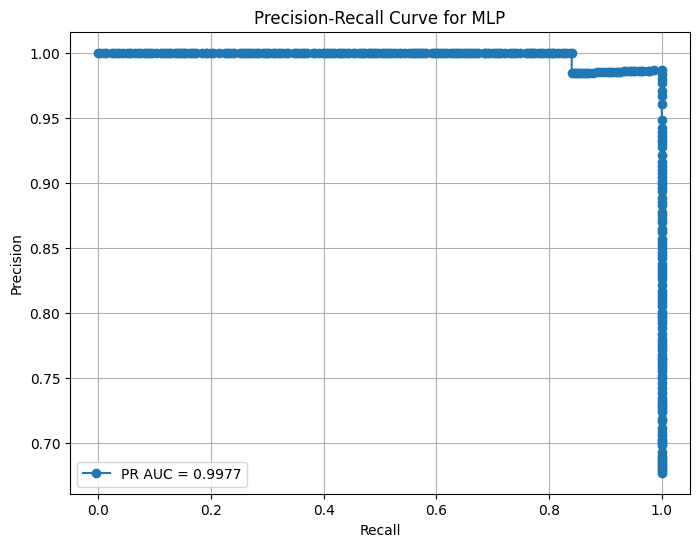

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/labeled_data.csv'
dataset = pd.read_csv(file_path)

# Extract 'posts' and 'encourages_drugs' columns
posts = dataset['posts']
labels = dataset['encourages_drugs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(posts, labels, test_size=0.2, random_state=42)

# Define models
models = {
    'SVM (Linear)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_linear', SVC(kernel='linear', random_state=42, probability=True))
    ]),
    'SVM (RBF)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_rbf', SVC(kernel='rbf', random_state=42, probability=True))
    ]),
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('logistic_regression', LogisticRegression(random_state=42))
    ]),
    'Gaussian Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('scaler', StandardScaler(with_mean=False)),
        ('naive_bayes', GaussianNB())
    ]),
    'MLP': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('mlp', MLPClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('random_forest', RandomForestClassifier(random_state=42))
    ])
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dictionary to hold model results
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')
    recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
for model_name, metrics in results.items():
    print(f'{model_name} Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')

# Plot Precision-Recall Curve for MLP
def plot_precision_recall_curve(model, X_test, y_test_encoded, model_name):
    # Get the true binary labels
    y_test_bin = y_test_encoded

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test_bin, y_prob)

    # Compute AUC
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', label=f'PR AUC = {pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Precision-Recall Curve for MLP
mlp_model = models['MLP']
plot_precision_recall_curve(mlp_model, X_test, y_test_encoded, 'MLP')


SVM (Linear) Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


SVM (RBF) Metrics:
Accuracy: 0.9747
Precision: 0.9863
Recall: 0.9762
F1 Score: 0.9812


Logistic Regression Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Gaussian Naive Bayes Metrics:
Accuracy: 0.9332
Precision: 0.9853
Recall: 0.9150
F1 Score: 0.9489


MLP Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Random Forest Metrics:
Accuracy: 0.9908
Precision: 0.9866
Recall: 1.0000
F1 Score: 0.9932




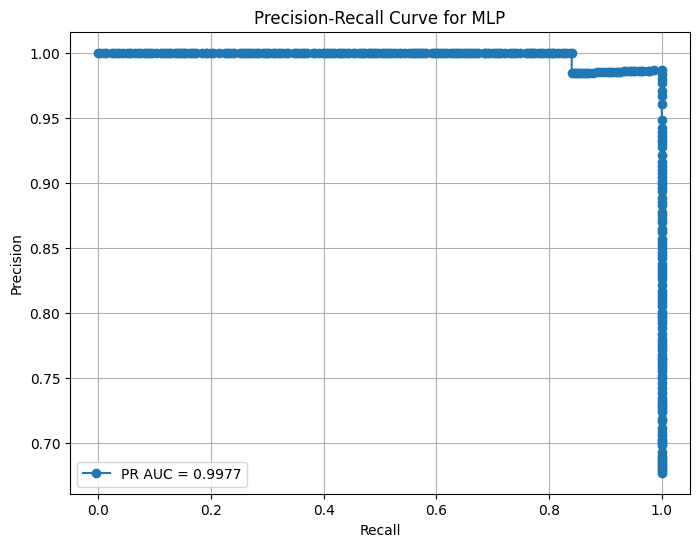

In [ ]:
#roc curve

SVM (Linear) Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


SVM (RBF) Metrics:
Accuracy: 0.9747
Precision: 0.9863
Recall: 0.9762
F1 Score: 0.9812


Logistic Regression Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Gaussian Naive Bayes Metrics:
Accuracy: 0.9332
Precision: 0.9853
Recall: 0.9150
F1 Score: 0.9489


MLP Metrics:
Accuracy: 0.9816
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9864


Random Forest Metrics:
Accuracy: 0.9908
Precision: 0.9866
Recall: 1.0000
F1 Score: 0.9932




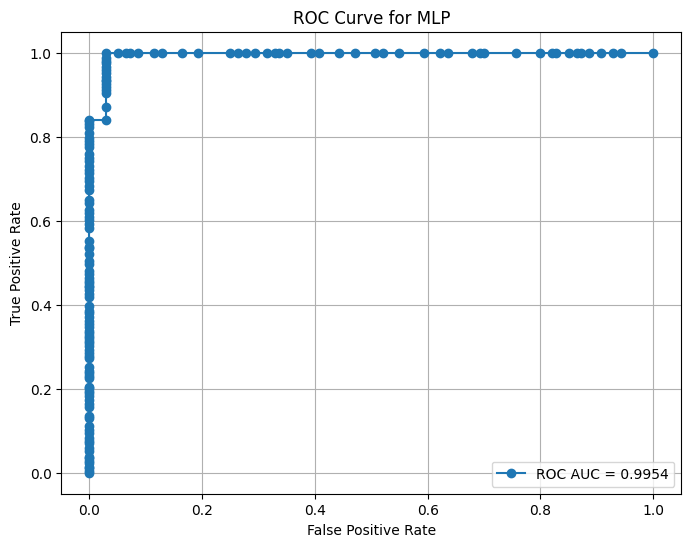

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/labeled_data.csv'
dataset = pd.read_csv(file_path)

# Extract 'posts' and 'encourages_drugs' columns
posts = dataset['posts']
labels = dataset['encourages_drugs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(posts, labels, test_size=0.2, random_state=42)

# Define models
models = {
    'SVM (Linear)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_linear', SVC(kernel='linear', random_state=42, probability=True))
    ]),
    'SVM (RBF)': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm_rbf', SVC(kernel='rbf', random_state=42, probability=True))
    ]),
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('logistic_regression', LogisticRegression(random_state=42))
    ]),
    'Gaussian Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('scaler', StandardScaler(with_mean=False)),
        ('naive_bayes', GaussianNB())
    ]),
    'MLP': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('mlp', MLPClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('random_forest', RandomForestClassifier(random_state=42))
    ])
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dictionary to hold model results
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')
    recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
for model_name, metrics in results.items():
    print(f'{model_name} Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print('\n')

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test_encoded, model_name):
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', label=f'ROC AUC = {roc_auc:.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.grid(True)

    # Save the plot as JPEG
    plt.savefig(f'{model_name}_roc_curve.jpg', format='jpg')
    plt.show()

# Plot and save ROC Curve for MLP
mlp_model = models['MLP']
plot_roc_curve(mlp_model, X_test, y_test_encoded, 'MLP')


In [ ]:
#confusion matrix of MLP

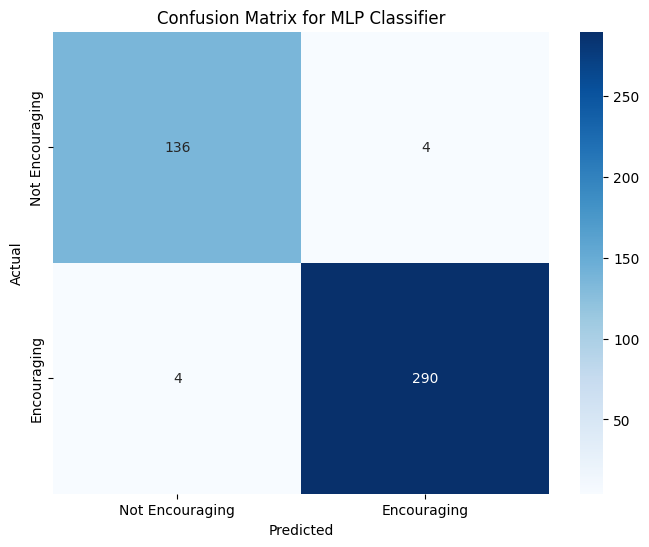

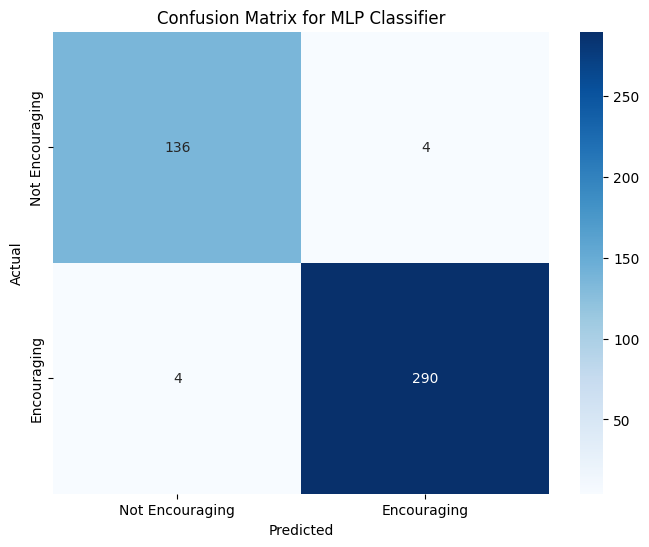

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/labeled_data.csv')

# Define features and labels
X = data['posts']
y = data['encourages_drugs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the MLP model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Encouraging', 'Encouraging'],
            yticklabels=['Not Encouraging', 'Encouraging'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/labeled_data.csv')

# Define features and labels
X = data['posts']
y = data['encourages_drugs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MLP pipeline
mlp = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('mlp', MLPClassifier(random_state=42))
])

# Fit the MLP model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Encouraging', 'Encouraging'],
            yticklabels=['Not Encouraging', 'Encouraging'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()


In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 758.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246559 sha256=20b8ad2e32af6651adf59e5501868eb217104a940ff3d6ecdd251301bd184610
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
#fasttext

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import fasttext
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = '/content/labeled_data.csv'
dataset = pd.read_csv(file_path)

# Extract 'posts' and 'encourages_drugs' columns
posts = dataset['posts']
labels = dataset['encourages_drugs']

# Convert labels to FastText format
def format_for_fasttext(texts, labels, filename):
    with open(filename, 'w') as file:
        for text, label in zip(texts, labels):
            file.write(f"__label__{label} {text}\n")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(posts, labels, test_size=0.2, random_state=42)

# Save data to files
format_for_fasttext(X_train, y_train, 'train.txt')
format_for_fasttext(X_val, y_val, 'val.txt')

# Train the FastText model
model = fasttext.train_supervised(input='train.txt', epoch=25, lr=1.0, wordNgrams=2, dim=50)

# Save the trained model
model.save_model('model.bin')

# Load the trained model
model = fasttext.load_model('model.bin')

# Predict labels for validation set
def predict(model, texts):
    predictions = []
    for text in texts:
        labels, _ = model.predict(text)
        # Extract the label
        label = labels[0].replace("__label__", "")
        predictions.append(int(label))
    return predictions

# Load validation set texts and true labels
val_texts = X_val.tolist()
true_labels = y_val.tolist()

# Make predictions
predicted_labels = predict(model, val_texts)

# Convert true_labels to integers if needed
true_labels = [int(label) for label in true_labels]

# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9816
Precision: 0.9816
Recall: 0.9816
F1 Score: 0.9816


In [ ]:
#LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample DataFrame (replace this with your actual data)
# df = pd.DataFrame({'text': [...], 'label': [...]})
texts = df['posts'].values
labels = df['encourages_drugs'].values

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_len = 100  # Adjust based on your data
X_padded = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
print("Unique values in labels:", np.unique(labels))


Unique values in labels: [0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Check the conversion
print("Labels after encoding:", np.unique(y))


Labels after encoding: [0 1]


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample DataFrame (replace with your actual data)
# df = pd.DataFrame({'posts': [...], 'encourages_drugs': [...]})
texts = df['posts'].values
labels = df['encourages_drugs'].values

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_len = 100  # Adjust based on your data
X_padded = pad_sequences(sequences, maxlen=max_len)

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define the LSTM model
def create_lstm_model(vocab_size, embedding_dim=50, max_len=100):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model parameters
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 50

model = create_lstm_model(vocab_size, embedding_dim, max_len)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

# Example predictions
predictions = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print results
for metric, value in results.items():
    print(f'{metric}: {value:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.6692 - loss: 0.6498 - val_accuracy: 0.6839 - val_loss: 0.5839
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.7367 - loss: 0.5160 - val_accuracy: 0.8621 - val_loss: 0.3850
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9327 - loss: 0.2628 - val_accuracy: 0.8448 - val_loss: 0.3116
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9392 - loss: 0.1761 - val_accuracy: 0.9195 - val_loss: 0.1825
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.9848 - loss: 0.0791 - val_accuracy: 0.9425 - val_loss: 0.1143
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9651 - loss: 0.0980
Test Accuracy: 0.9631
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
Accuracy: 0.9631
Precision: 0.9813
Recall: 0.9599
F1 Score: 0.9705


In [ ]:
# Function to predict new text
def predict_new_text(text):
    # Preprocess the new text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Predict
    prediction = model.predict(padded_sequence)
    return (prediction > 0.5).astype(int)[0][0]

# Function to take user input and provide prediction
def get_user_input_and_predict():
    user_text = input("Enter text to classify: ")
    prediction = predict_new_text(user_text)
    print(f"Prediction for the new text: {'Encourages drugs' if prediction == 1 else 'Does not encourage drugs'}")

# Get user input and predict
get_user_input_and_predict()


Enter text to classify: hduhfdj
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for the new text: Does not encourage drugs
